In [7]:
#Using AMS DC from Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import MultipleLocator

# p99_plot - cross_dc 


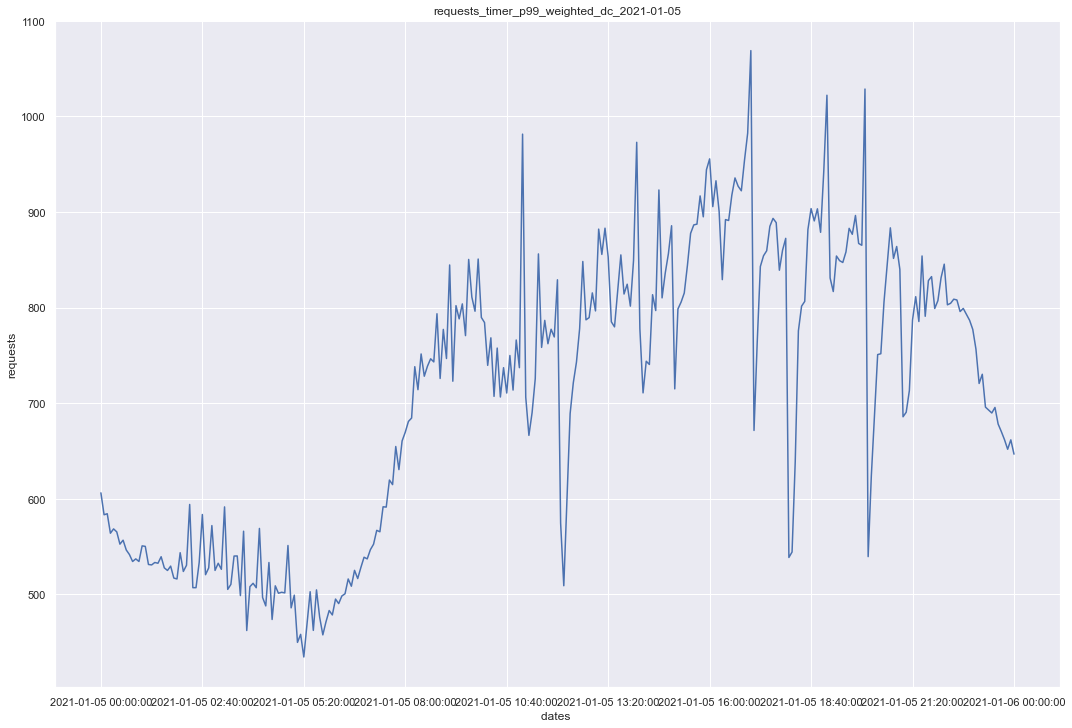

In [8]:
requests_timer_p99 = pd.read_csv('Data/trc_requests_timer_p99_weighted_dc_2021-01-05.csv', encoding = 'ISO-8859-1')
# print(max_load.info)
sns.set(rc={'figure.figsize':(18,12.27)})
ax = sns.lineplot(x = 'ds', y = 'y', data = requests_timer_p99 )
ax.set(xlabel='dates ', ylabel='requests', title='requests_timer_p99_weighted_dc_2021-01-05')
ax.xaxis.set_major_locator(MultipleLocator(32))



#  Scaling 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [10]:
data_path = 'Data/Dc/AM/'
max__node_load_15_min = pd.read_csv(data_path+'max(node_load15{hostname=~_^water._}) by (domain)/max(node_load15{hostname=~_^water._}) by (domain)_2021-01-05.csv', encoding = 'ISO-8859-1')
avg__node_load_15_min = pd.read_csv(data_path+'avg(node_load15{hostname=~_^water._}) by (domain)/avg(node_load15{hostname=~_^water._}) by (domain)_2021-01-05.csv', encoding = 'ISO-8859-1')
node_cpu_seconds_total = pd.read_csv(data_path+'avg(count (node_cpu_seconds_total{mode=_idle_,hostname=~_^water._,job=~_node_exporter_}) by (hostname))/avg(count (node_cpu_seconds_total{mode=_idle_,hostname=~_^water._,job=~_node_exporter_}) by (hostname))_2021-01-05.csv', encoding = 'ISO-8859-1')
max_over_time = pd.read_csv(data_path+'max(max_over_time(TRC_server_gauge{server=~_^water._, _label_0=_JVM_, _label_1=_MemoryUsage_, _label_2=_pools_,_label_3=_GenPauseless-Old-Gen_,_label_4=_used_}[20m])) by (domain)/max(max_over_time(TRC_server_gauge{server=~_^water._, _label_0=_JVM_, _label_1=_MemoryUsage_, _label_2=_pools_,_label_3=_GenPauseless-Old-Gen_,_label_4=_used_}[20m])) by (domain)_2021-01-05.csv', encoding = 'ISO-8859-1')


In [11]:
max_over_time['y'].shape



(289,)

In [12]:
max_over_time_scaled = scaler.fit_transform([max_over_time['y']])

max_over_time_scaled.shape

(1, 289)

In [13]:
max_over_time_scaled = max_over_time_scaled.reshape(-1,1)
max_over_time_scaled.shape
max_over_time_scaled


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

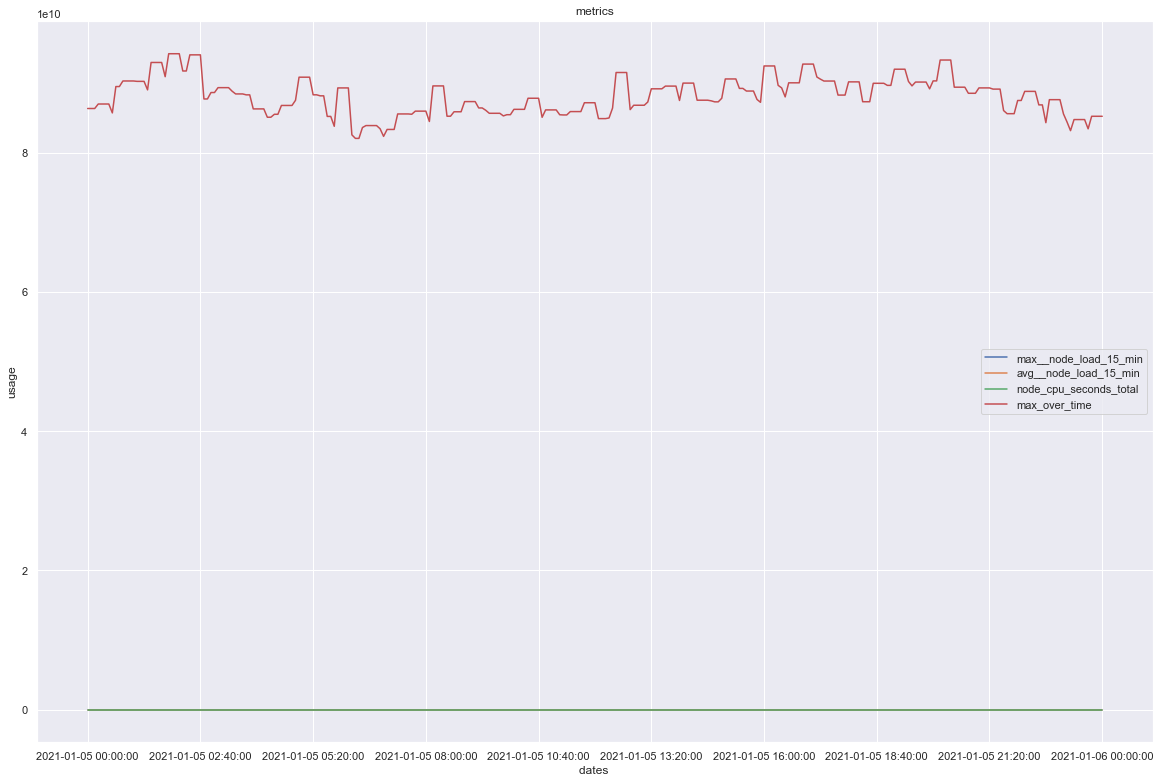

In [14]:


sns.set(rc={'figure.figsize':(20,13.27)})
ax = sns.lineplot(x = 'ds', y = 'y',label='max__node_load_15_min', data = max__node_load_15_min )
ax1 = sns.lineplot(x = 'ds', y = 'y',label='avg__node_load_15_min', data = avg__node_load_15_min )
ax2 = sns.lineplot(x = 'ds', y = 'y',label='node_cpu_seconds_total', data = node_cpu_seconds_total )
ax3 = sns.lineplot(x = 'ds', y = 'y',label='max_over_time', data = max_over_time )
ax.set(xlabel='dates ', ylabel='usage', title='metrics')
ax.xaxis.set_major_locator(MultipleLocator(32))


In [15]:
data_path = 'Data/Dc/AM/'
max__node_load_15_min = pd.read_csv(data_path+'max(node_load15{hostname=~_^water._}) by (domain)/max(node_load15{hostname=~_^water._}) by (domain)_2021-01-05.csv', encoding = 'ISO-8859-1')
avg__node_load_15_min = pd.read_csv(data_path+'avg(node_load15{hostname=~_^water._}) by (domain)/avg(node_load15{hostname=~_^water._}) by (domain)_2021-01-05.csv', encoding = 'ISO-8859-1')
node_cpu_seconds_total = pd.read_csv(data_path+'avg(count (node_cpu_seconds_total{mode=_idle_,hostname=~_^water._,job=~_node_exporter_}) by (hostname))/avg(count (node_cpu_seconds_total{mode=_idle_,hostname=~_^water._,job=~_node_exporter_}) by (hostname))_2021-01-05.csv', encoding = 'ISO-8859-1')
max_over_time = pd.read_csv(data_path+'max(max_over_time(TRC_server_gauge{server=~_^water._, _label_0=_JVM_, _label_1=_MemoryUsage_, _label_2=_pools_,_label_3=_GenPauseless-Old-Gen_,_label_4=_used_}[20m])) by (domain)/max(max_over_time(TRC_server_gauge{server=~_^water._, _label_0=_JVM_, _label_1=_MemoryUsage_, _label_2=_pools_,_label_3=_GenPauseless-Old-Gen_,_label_4=_used_}[20m])) by (domain)_2021-01-05.csv', encoding = 'ISO-8859-1')


In [16]:
max_over_time_scaled = scaler.fit_transform([max_over_time['y']])

max_over_time_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

# 3 metrics on graph, one day

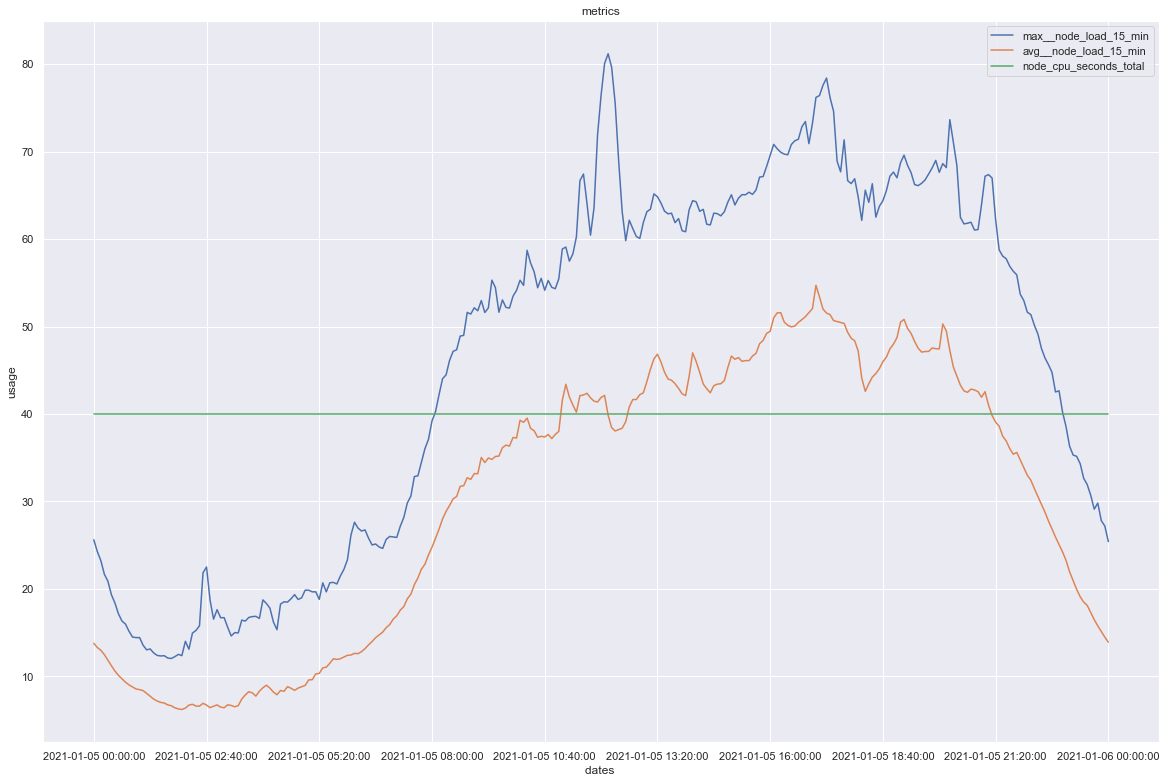

In [17]:


sns.set(rc={'figure.figsize':(20,13.27)})
ax = sns.lineplot(x = 'ds', y = 'y',label='max__node_load_15_min', data = max__node_load_15_min )
ax1 = sns.lineplot(x = 'ds', y = 'y',label='avg__node_load_15_min', data = avg__node_load_15_min )
ax2 = sns.lineplot(x = 'ds', y = 'y',label='node_cpu_seconds_total', data = node_cpu_seconds_total )
# ax3 = sns.lineplot(x = 'ds', y = 'y',label='max_over_time', data = max_over_time )
ax.set(xlabel='dates ', ylabel='usage', title='metrics')
ax.xaxis.set_major_locator(MultipleLocator(32))


In [18]:
import os
from functools import reduce
from os import path

# Combine all p99 dates 